<a href="https://colab.research.google.com/github/jsb58p/CS-431-Operating-Systems/blob/main/deadlockDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install networkx
!pip install matplotlib

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
class ResourceAllocationGraph:
  def __init__(self, processes, resources):
    self.graph = nx.DiGraph()
    self.process = processes
    self.resources = resources

  def add_edge(self, process, resource):
    self.graph.add_edge(process, resource)

  def visualize(self):
    position = nx.spring_layout(self.graph)
    options={
        "font_size":20,
        "node_size":2000,
        "node_color":"white",
        "edgecolors":"black",
        "linewidths":5,
        "width": 5,
        "with_labels":True,
    }
    nx.draw(self.graph, **options)
    plt.show()

  def detect_deadlock(self):
    # Find cycles in the graph
    cycles = list(nx.simple_cycles(self.graph))

    # check if cycles are present, then deadlock!
    if cycles:
      print('Deadlock detected!')
      print('Processes and resources involved are: ', cycles)
    else:
      print('No deadlocks detected')

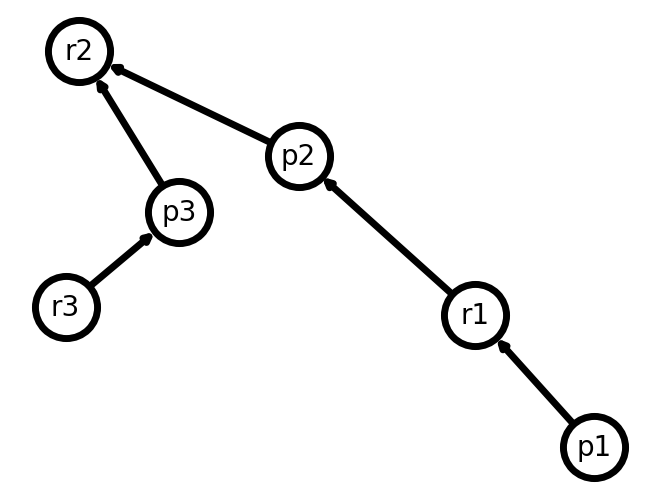

No deadlocks detected


In [17]:
process = ['p1', 'p2', 'p3']
resources = ['r1', 'r2', 'r3']
rag1 = ResourceAllocationGraph(process, resources)
rag1.add_edge('p1', 'r1')
rag1.add_edge('r1', 'p2')
rag1.add_edge('p2', 'r2')
rag1.add_edge('p3', 'r2')
rag1.add_edge('r3', 'p3')
rag1.visualize()
rag1.detect_deadlock()

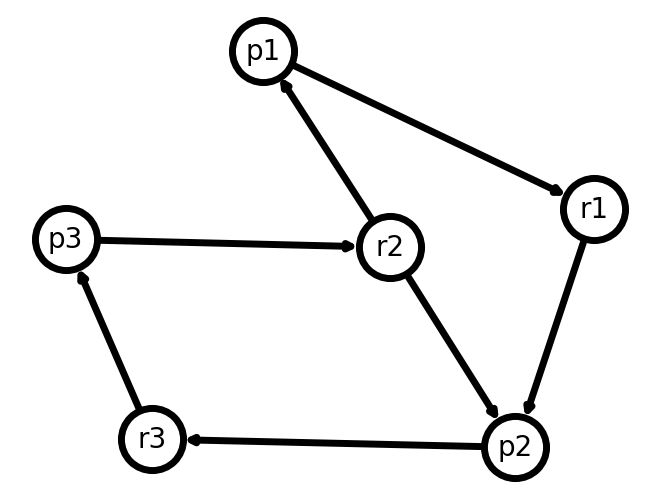

Deadlock detected!
Processes and resources involved are:  [['r1', 'p2', 'r3', 'p3', 'r2', 'p1'], ['r2', 'p2', 'r3', 'p3']]


In [19]:
process = ['p1', 'p2', 'p3']
resources = ['r1', 'r2', 'r3', 'r4']
rag1 = ResourceAllocationGraph(process, resources)
rag1.add_edge('p1', 'r1')
rag1.add_edge('r1', 'p2')
rag1.add_edge('p2', 'r3')
rag1.add_edge('r2', 'p1')
rag1.add_edge('r2', 'p2')
rag1.add_edge('r3', 'p3')
rag1.add_edge('p3', 'r2')
rag1.visualize()
rag1.detect_deadlock()

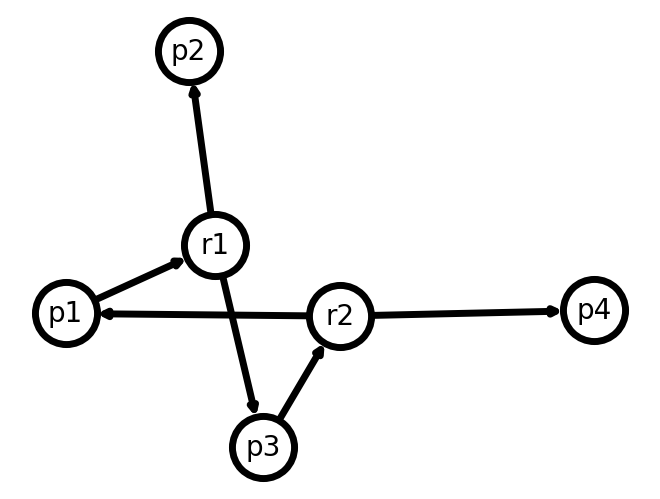

Deadlock detected!
Processes and resources involved are:  [['r1', 'p3', 'r2', 'p1']]


In [21]:
process = ['p1', 'p2', 'p3']
resources = ['r1', 'r2', 'r3', 'r4']
rag1 = ResourceAllocationGraph(process, resources)
rag1.add_edge('p1', 'r1')
rag1.add_edge('r1', 'p2')
rag1.add_edge('r1', 'p3')
rag1.add_edge('p3', 'r2')
rag1.add_edge('r2', 'p1')
rag1.add_edge('r2', 'p4')
rag1.visualize()
rag1.detect_deadlock()

In [ ]:
# The program doesn't agree with the powerpoint slides, I think because there is a cycle found by detect_deadlock and there is assumed to be only
# one unit per resource in the program, unlike how it is represented on the powerpoint slide where r1 and r2 have two units each.